The purpose of this code is applying what I learned on the topic, so it will be a lot more comments than usual. This is a very simple ANN model where I putted in practice the most basic knowledge in tensorflow. Using the famous mnist dataset, we will create an algorithm to identify the number displayed in the images available on the dataset. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

import matplotlib.pyplot as plt
import numpy as np

First, we load and split the data we will use in the project. Thankfully, Keras already does a lot of work for us with load_data() ready for us to use. The dataset consist of 60.000 train images and 10.000 test images, all with the 28x28 size and showcasing numbers from 0 to 9.

In [2]:
# ATTENTION: This cell will load into your machine the dataset. If you are not interested in dowloading the data, skip this step
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

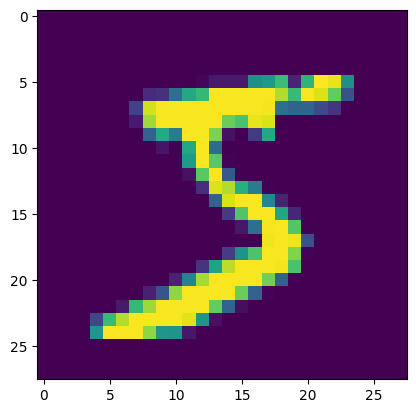

In [3]:
# Here an example of what an image from the dataset looks like, this one representing the number 5
plt.imshow(X_train[0])

In [4]:
# And here is how the raw data of the image looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The dataset we have available is already organized and ready for use, so we don't have to do much management to get it ready for our model. The only change that we will make here is scaling down the value of the image arrays, so that it is easier for the model to digest the data. As we know from how colors work in programming, the maximum value for a color value is 255. With that in mind, we will scale down the values in our dataset image to fit between 0 and 1 by dividing all values by 255.

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now that we understand better our data and did some small changes for better computing, we will create our model. It will be simple, with only 3 layers. First, a "Flatten" layer to turn our multidimensional data (the images) into one-dimensional, so the model can accept it. Then, we will add two "Dense" layers to compute our data, the last one having 10 neurons to represent our 10 labels. The number of neutrons on our middle "Dense" layer is a bit arbitrary, as is hard to decide an ideal, fixed value. Since this is just a learning exercise and we don't want to be here all day, we'll set a low value of 32 neutrons, which should be enough to give a good result and not take long.

In [7]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


For the compilation of the model, our loss function will be the "sparse_categorical_crossentropy", as it fits well to our classification problem with multiple label classes and labels provided as integers. For the optimizer, we will use "Adam" as it is the most common, and our model doesn't demand anything more specific. 

In [9]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [10]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4025 - accuracy: 0.8879 - val_loss: 0.2452 - val_accuracy: 0.9312
Epoch 2/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2248 - accuracy: 0.9348 - val_loss: 0.1986 - val_accuracy: 0.9434
Epoch 3/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1744 - accuracy: 0.9490 - val_loss: 0.1666 - val_accuracy: 0.9532
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1448 - accuracy: 0.9577 - val_loss: 0.1557 - val_accuracy: 0.9555
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1230 - accuracy: 0.9644 - val_loss: 0.1350 - val_accuracy: 0.9603
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1085 - accuracy: 0.9684 - val_loss: 0.1322 - val_accuracy: 0.9607
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0972 - accuracy: 0.9715 - val_loss: 0.1316 - val_accuracy:

The model return to us a 10 points array, in which each data point represents the probability for it to be the right answer. Being so, we will try to predict the value for the test data and use the argmax function so choose the label with most probability.

In [11]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 0s 794us/step


Now that we have our predction, we can use some tools to measure ou model based on how well the predictions went

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.98      0.94      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



As we can see in the cllassification report, our model went pretty great! With high accuracy, precision and recall values, we can be confident that this model would perform well when applied to other cases. Looking at individual labels, there may be a reason to worry on some specific labels getting lower results than the average, manly "4" with a lower precision score of 0.93, while "8" and "9" have an lower recal score of 0.95 and 0.94 respectively. Still, even though these values are less than the average, there are still high, and the f1-score of all labels is close to the average, so this discrepancy is not a big problem.